<a href="https://colab.research.google.com/github/DaveAsk/Data-Science/blob/main/Simple_RNN_on_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [5]:
# Generate synthetic time series data
np.random.seed(0)
timesteps = 100
time = np.arange(0, 10, 0.1)
sinewave = np.sin(time) + 0.1 * np.random.randn(timesteps)

In [6]:
sinewave

array([ 0.17640523,  0.13984914,  0.29654313,  0.51960953,  0.57617414,
        0.38169775,  0.65965132,  0.62908197,  0.70703421,  0.82438676,
        0.85587534,  1.03663471,  1.00814286,  0.97572569,  1.02983605,
        1.03086242,  1.14898151,  0.97114898,  1.0051544 ,  0.86089051,
        0.65399845,  0.92857123,  0.89494002,  0.67148871,  0.90243864,
        0.45303558,  0.52007722,  0.4086615 ,  0.48826607,  0.38618521,
        0.15661475,  0.07939691, -0.14715272, -0.35582534, -0.29033232,
       -0.33514833, -0.31949138, -0.40959816, -0.65059057, -0.71799643,
       -0.86165779, -0.9602789 , -1.04220279, -0.7210884 , -1.00256729,
       -1.02133755, -1.11897054, -0.92217422, -1.15755439, -1.00372664,
       -1.04847093, -0.88712443, -0.93453517, -0.95033066, -0.77558271,
       -0.66270714, -0.62461492, -0.52043835, -0.52803439, -0.41015078,
       -0.34666154, -0.21811782, -0.16440403, -0.15581436,  0.13429182,
        0.17494189,  0.14852153,  0.45112815,  0.40338351,  0.58

In [7]:
# Create sequences for training (X) and corresponding targets (y)
X_train, y_train = [], []
for i in range(timesteps - 10):  # Adjust the loop limit
    X_train.append(sinewave[i:i+10])
    y_train.append(sinewave[i+10])


X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data for RNN input (samples, timesteps, features)
X_train = X_train.reshape((-1, 10, 1))

In [9]:
# Define the RNN model
model = Sequential()
model.add(SimpleRNN(10, activation='relu', input_shape=(10, 1)))
model.add(Dense(1))


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

In [12]:
# Make predictions on the entire dataset
predictions = model.predict(X_train)

3/3 [==============================] - 0s 5ms/step


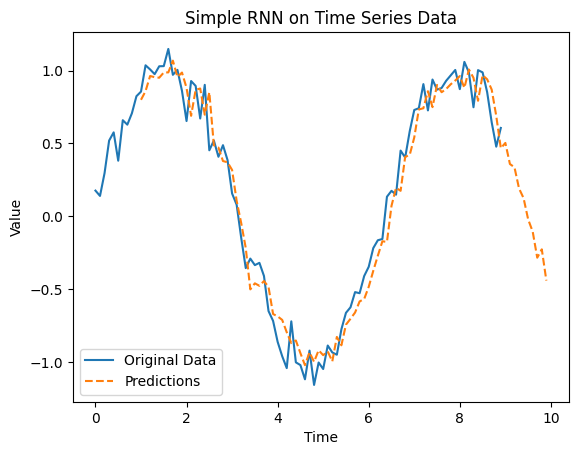

In [13]:
# Plot the original time series and predicted values
plt.plot(time[:-10], sinewave[:-10], label='Original Data')
plt.plot(time[10:], predictions, label='Predictions', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Simple RNN on Time Series Data')
plt.legend()
plt.show()
